<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/5_CodingDrillDown/Experiments/MNIST_FinalIteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Iteration

**Objective** : In previous [experiment](https://github.com/gkdivya/EVA/blob/main/4_ArchitecturalBasics/Experiments/MNIST_Exp2_WithTransitionBlock.ipynb) with **5690** parameters, we were able to achieve 98% accuracy. In this notebook, we will be using **Batch Normalization** and observe if it helps with the accuracy.

**Batch Normalization**:
Even though we normalize the input values with Image normalization transform, parameter values changes while training the network.

Batch Normalization is a technique to normalize the values getting passed within the network. 

Its normally applied to activations of a prior convolutional layer or on the inputs directly.

[torch.nn.BatchNorm2d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html) 

It helps with faster and smoother training process.


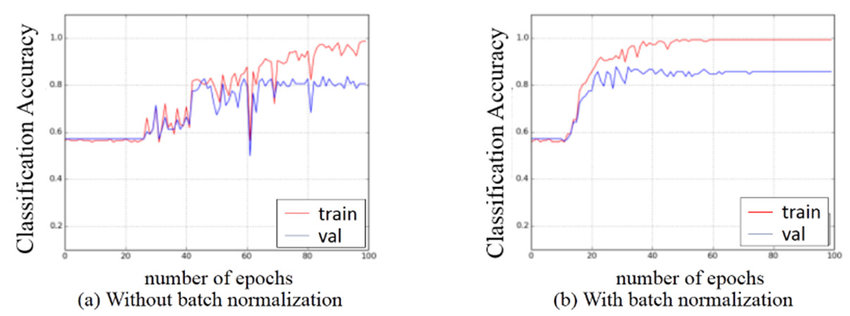


In [11]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Dropout(0.1),

            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1),
        ) 

        #Transition Block
        self.trans1 = nn.Sequential(
            
            nn.MaxPool2d(2, 2), # output_size = 12
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=(1, 1), padding=0, bias=False)
        ) # output_size = 24
        

        # CONVOLUTION BLOCK 2
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(0.1),

            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(8),
            nn.Dropout(0.1),

            nn.Conv2d(in_channels=8, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(8),
            nn.Dropout(0.1),

            nn.Conv2d(in_channels=8, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10),
            nn.Dropout(0.1)

        ) 
        
        # OUTPUT BLOCK
        self.avgpool2d = nn.AvgPool2d(kernel_size=6)

        self.conv3 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(1, 1), padding=0, bias=False)

    def forward(self, x):
        x = self.conv1(x)
        x = self.trans1(x)
        x = self.conv2(x)
        x = self.avgpool2d(x)
        x = self.conv3(x)

        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

In [4]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'epoch={epoch} loss={loss.item():.10f} batch_id={batch_idx:05d}')
    #print( f'Epoch {epoch} - \nTrain set : loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [7]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.015, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=10, gamma=0.01)

for epoch in range(1, 20):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

    #scheduler.step()

  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.1320, Accuracy: 9634/10000 (96.34%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0748, Accuracy: 9763/10000 (97.63%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0475, Accuracy: 9857/10000 (98.57%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0509, Accuracy: 9857/10000 (98.57%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0420, Accuracy: 9872/10000 (98.72%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0328, Accuracy: 9901/10000 (99.01%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0322, Accuracy: 9896/10000 (98.96%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0378, Accuracy: 9885/10000 (98.85%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0342, Accuracy: 9909/10000 (99.09%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0284, Accuracy: 9904/10000 (99.04%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0284, Accuracy: 9928/10000 (99.28%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0263, Accuracy: 9920/10000 (99.20%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0304, Accuracy: 9913/10000 (99.13%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0259, Accuracy: 9922/10000 (99.22%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0312, Accuracy: 9907/10000 (99.07%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0328, Accuracy: 9896/10000 (98.96%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0275, Accuracy: 9921/10000 (99.21%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0290, Accuracy: 9914/10000 (99.14%)



epoch=19 loss=0.0265761372 batch_id=00468: 100%|██████████| 469/469 [00:11<00:00, 40.56it/s]


Test set: Average loss: 0.0283, Accuracy: 9918/10000 (99.18%)



In [49]:
results = {'Correct': [] ,
           'Wrong': []}

with torch.no_grad():
  data, target = data.to(device), target.to(device)
  output = model(data)        
  pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
  for index in range(len(test_loader)):
    plt_dt = dict()
    plt_dt['Image'], plt_dt['actual'], plt_dt['pred'] = data[index].to('cpu'), target[index].to('cpu'), pred[index].to('cpu')

    #Correct prediction
    if (plt_dt['pred'] == plt_dt['actual']):
      results['Correct'].append(plt_dt)
    #Wrong prediction
    else:
      results['Wrong'].append(plt_dt)

In [50]:
import numpy as np

In [52]:
len(results['Wrong'])

1

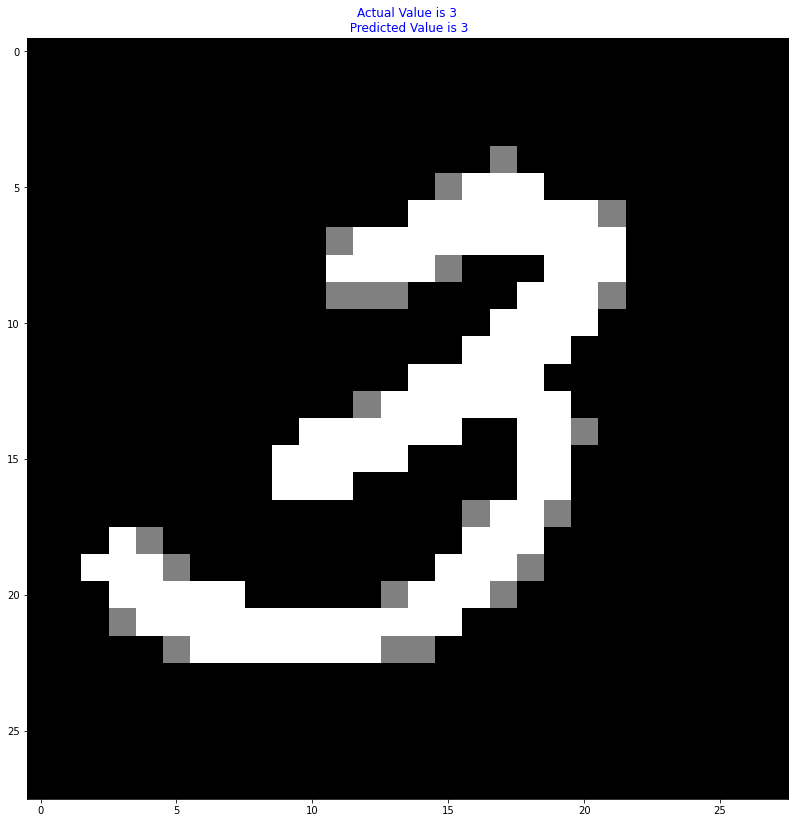

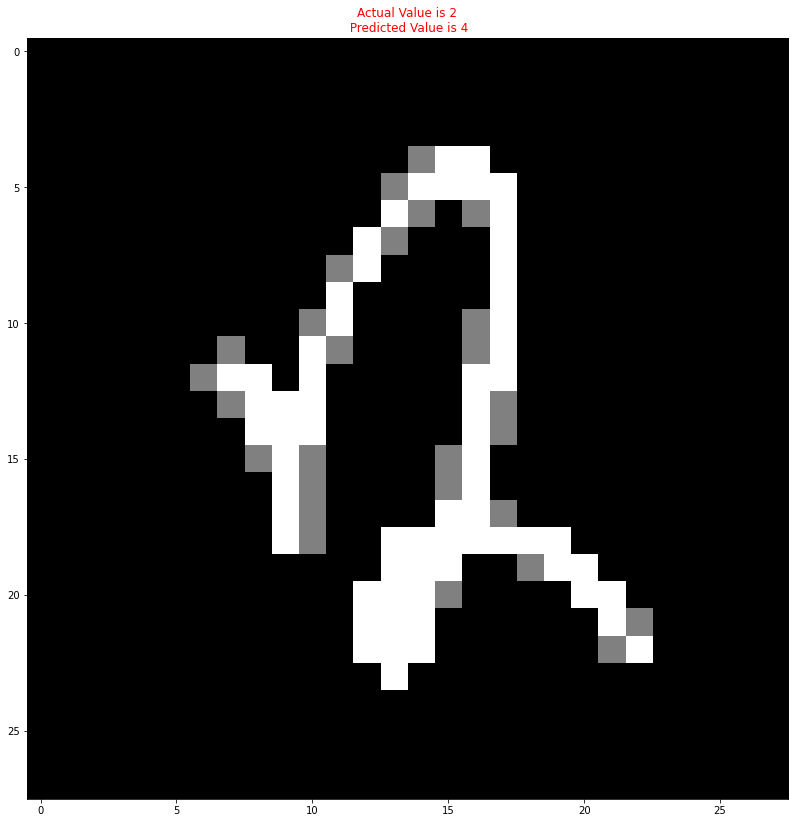

In [54]:
results_to_eval = 1
plt.figure(figsize=(14,14)) 

for i in range(len(results['Correct'])):
  #plt.subplot(1,results_to_eval,i+1)  
  pixels = np.array(results['Correct'][i]['Image'].cpu() , dtype='uint8')

  # Reshape the array into 28 x 28 array (2-dimensional array)
  pixels = pixels.reshape((28, 28))

  # Plot
  plt.title('Actual Value is {label}\n Predicted Value is {pred}'.format(label=results['Correct'][i]['actual'].cpu(), pred =results['Correct'][i]['pred'].cpu()[0]),  color='b')
  plt.imshow(pixels, cmap='gray')


plt.show()

plt.figure(figsize=(14,14)) 

for i in range(len(results['Wrong'])):
  plt.subplot(1,results_to_eval,i+1)  
  pixels = np.array(results['Wrong'][i]['Image'].cpu() , dtype='uint8')

  # Reshape the array into 28 x 28 array (2-dimensional array)
  pixels = pixels.reshape((28, 28))

  # Plot
  plt.title('Actual Value is {label}\n Predicted Value is {pred}'.format(label=results['Wrong'][i]['actual'].cpu(), pred =results['Wrong'][i]['pred'].cpu()[0]), color='r')
  plt.imshow(pixels, cmap='gray')

plt.show()
